In [175]:
import numpy as np
import pandas as pd
df = pd.read_csv('M1_final.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [176]:
for col in df:
    if(df[col].isnull().values.any()):
        print(col)
df[df.isnull().any(axis=1)]

Wind


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
15156,12,19,4,B6,N648JB,FLL,60,189,1069,1275,...,10,55,NaN,0,0,30.42,Mostly Cloudy,21,33,41
15157,12,19,4,9E,N136EV,PWM,3,83,273,1349,...,10,55,NaN,0,0,30.42,Mostly Cloudy,21,33,40


In [177]:
df.drop([15156,15157],inplace=True)

In [178]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['OP_UNIQUE_CARRIER']  = le.fit_transform(df['OP_UNIQUE_CARRIER'])
df['TAIL_NUM']  = le.fit_transform(df['TAIL_NUM'])
df['DEST']  = le.fit_transform(df['DEST'])
df['Wind']  = le.fit_transform(df['Wind'])
df['Condition']  = le.fit_transform(df['Condition'])
df['Dew Point']  = le.fit_transform(df['Dew Point'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,1405,10,-1,124,636,324,...,30,58,15,25,38,29.86,4,9,17,14
1,11,1,5,3,2074,28,-7,371,2475,340,...,30,58,15,25,38,29.86,4,9,17,15
2,11,1,5,3,1942,20,40,181,1069,301,...,30,58,15,25,38,29.86,4,9,17,22
3,11,1,5,3,2091,30,-2,168,944,345,...,30,58,15,25,38,29.86,4,9,17,12
4,11,1,5,4,1583,1,-4,139,760,360,...,28,58,15,24,35,29.91,4,9,17,13


In [179]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.9)

In [182]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(x_train,y_train)
pred1 = lreg.predict(x_test)
rmse1 = np.sqrt(np.mean((pred1-y_test)**2))

rmse1

6.398765770949331

In [183]:
from sklearn.linear_model import Ridge

rid = Ridge(alpha = 0.05,normalize = True)
rid.fit(x_train,y_train)
pred2 = rid.predict(x_test)
rmse2 = np.sqrt(np.mean((pred2-y_test) **2 ))
                
rmse2

6.398826700492179

In [184]:
from sklearn.linear_model import Lasso

las = Lasso(alpha = 0.3,normalize = True)
las.fit(x_train,y_train)
pred3 = las.predict(x_test)
rmse3 = np.sqrt(np.mean((pred3-y_test) **2 ))
                
rmse3

6.709421998117333

In [185]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 20)
knn.fit(x_train,y_train)
pred4 = knn.predict(x_test)
rmse4 = np.sqrt(np.mean((pred4-y_test) **2 ))
                
rmse4

6.428751466641663

In [186]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train)
y = sc_y.fit_transform(x_test)

svr = SVR()
svr.fit(X,y_train)
pred5 = svr.predict(y)
rmse5 = np.sqrt(np.mean((pred5-y_test) **2 ))
                
rmse5

6.1371595783647015

In [187]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge()
br.fit(x_train,y_train)
pred6 = br.predict(x_test)
rmse6 = np.sqrt(np.mean((pred6-y_test) **2 ))
                
rmse6

6.39948931087585

In [188]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(x_train,y_train)
pred7 = rfr.predict(x_test)
rmse7 = np.sqrt(np.mean((pred7-y_test) **2 ))
                
rmse7

5.581517202495105

In [189]:
from lightgbm import LGBMRegressor

lgbr = LGBMRegressor()
lgbr.fit(x_train,y_train)
pred8 = lgbr.predict(x_test)
rmse8 = np.sqrt(np.mean((pred8-y_test) **2 ))
                
rmse8

5.651230672725454

In [190]:
np.shape(x_train)

(25936, 22)

In [191]:
df1 = pd.concat([x_train,x_test])
df1 = pd.get_dummies(data = df1,columns = ['OP_UNIQUE_CARRIER','DEST','Dew Point','Wind','Condition'])
x_train = df1.iloc[:25936,:]
x_test = df1.iloc[25936:,:]
x_train

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,...,Condition_15,Condition_16,Condition_17,Condition_18,Condition_19,Condition_20,Condition_21,Condition_22,Condition_23,Condition_24
14300,12,16,1,173,-2,390,2475,1080,1078,1290,...,0,0,0,0,0,0,0,0,0,0
9242,11,29,5,716,-2,675,4983,600,598,975,...,0,1,0,0,0,0,0,0,0,0
5118,11,16,6,329,0,179,740,960,960,1079,...,0,0,0,1,0,0,0,0,0,0
26761,1,25,6,892,8,263,1521,1282,1290,45,...,0,0,0,0,0,0,0,0,0,0
20217,1,5,7,765,0,407,2586,420,420,647,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20572,1,6,1,499,0,195,1028,550,550,745,...,0,1,0,0,0,0,0,0,0,0
5767,11,18,1,176,-7,383,2475,930,923,1133,...,0,0,0,0,0,0,0,0,0,0
13216,12,13,5,1610,-1,92,209,660,659,752,...,0,0,0,0,0,0,0,0,0,0
12633,12,11,3,1359,59,154,665,921,980,1075,...,0,0,0,1,0,0,0,0,0,0


In [192]:
from sklearn.linear_model import LinearRegression

ohlreg = LinearRegression()
ohlreg.fit(x_train,y_train)
ohpred1 = ohlreg.predict(x_test)
ohrmse1 = np.sqrt(np.mean((ohpred1-y_test)**2))

ohrmse1

6.125893069439335

In [193]:
from sklearn.linear_model import Ridge

ohrid = Ridge(alpha = 0.05,normalize = True)
ohrid.fit(x_train,y_train)
ohpred2 = ohrid.predict(x_test)
ohrmse2 = np.sqrt(np.mean((ohpred2-y_test) **2 ))
                
ohrmse2

6.135934901451502

In [194]:
from sklearn.linear_model import Lasso

ohlas = Lasso(alpha = 0.3,normalize = True)
ohlas.fit(x_train,y_train)
ohpred3 = ohlas.predict(x_test)
ohrmse3 = np.sqrt(np.mean((ohpred3-y_test) **2 ))
                
ohrmse3

6.709421998117333

In [195]:
from sklearn.neighbors import KNeighborsRegressor

ohknn = KNeighborsRegressor(n_neighbors = 20)
ohknn.fit(x_train,y_train)
ohpred4 = ohknn.predict(x_test)
ohrmse4 = np.sqrt(np.mean((ohpred4-y_test) **2 ))
                
ohrmse4

6.433070852234425

In [196]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
ohsc_X = StandardScaler()
ohsc_y = StandardScaler()
ohX = ohsc_X.fit_transform(x_train)
ohy = ohsc_y.fit_transform(x_test)

ohsvr = SVR()
ohsvr.fit(ohX,y_train)
ohpred5 = ohsvr.predict(ohy)
ohrmse5 = np.sqrt(np.mean((pred5-y_test) **2 ))
                
ohrmse5

6.1371595783647015

In [197]:
from sklearn.linear_model import BayesianRidge

ohbr = BayesianRidge()
ohbr.fit(x_train,y_train)
ohpred6 = ohbr.predict(x_test)
ohrmse6 = np.sqrt(np.mean((ohpred6-y_test) **2 ))
                
ohrmse6

6.130767543676664

In [198]:
from sklearn.ensemble import RandomForestRegressor

ohrfr = RandomForestRegressor(n_estimators = 100)
ohrfr.fit(x_train,y_train)
ohpred7 = ohrfr.predict(x_test)
ohrmse7 = np.sqrt(np.mean((ohpred7-y_test) **2 ))
                
ohrmse7

5.57542434193524

In [199]:
from lightgbm import LGBMRegressor

ohlgbr = LGBMRegressor()
ohlgbr.fit(x_train,y_train)
ohpred8 = ohlgbr.predict(x_test)
ohrmse8 = np.sqrt(np.mean((ohpred8-y_test) **2 ))
                
ohrmse8

5.635512858363109

In [200]:
RMSE = np.array([rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8])
RMSE1 = np.array([ohrmse1,ohrmse2,ohrmse3,ohrmse4,ohrmse5,ohrmse6,ohrmse7,ohrmse8])
print(RMSE)
print(RMSE1)

[6.39876577 6.3988267  6.709422   6.42875147 6.13715958 6.39948931
 5.5815172  5.65123067]
[6.12589307 6.1359349  6.709422   6.43307085 6.13715958 6.13076754
 5.57542434 5.63551286]


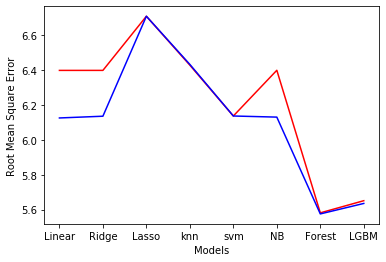

In [201]:
import matplotlib.pyplot as plt

plt.plot(['Linear','Ridge','Lasso','knn','svm','NB','Forest','LGBM'],RMSE,label='label_encoded',color = 'red')
plt.plot(['Linear','Ridge','Lasso','knn','svm','NB','Forest','LGBM'],RMSE1,label='One_hot_encoded',color = 'blue')
plt.xlabel('Models')
plt.ylabel('Root Mean Square Error')

plt.show()